In [ ]:
import pandas as pd
import numpy as np
import random as rnd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9505,1310930100,20150318T000000,525000.0,4,1.75,1570,16697,1.0,0,2,...,7.0,1030.0,540.0,1981.0,0.0,98052.0,47.6710,-122.135,1560.0,9698.0
9506,8103000110,20140603T000000,280000.0,2,1.50,1480,15641,1.0,0,0,...,7.0,1480.0,0.0,1940.0,0.0,98146.0,47.5008,-122.366,1520.0,7525.0
9507,8103000110,20150205T000000,490000.0,2,1.50,1480,15641,1.0,0,0,...,7.0,1480.0,0.0,1940.0,0.0,98146.0,47.5008,-122.366,1520.0,7525.0
9508,7227501765,20150323T000000,265000.0,4,1.75,1430,5490,1.0,0,0,...,6.0,1430.0,0.0,1942.0,0.0,98056.0,47.4940,-122.184,1030.0,5900.0
9509,824069188,20140902T000000,645000.0,4,2.25,2720,18295,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            1
sqft_above       3
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,9510.0,4.562081e+09,2.863151e+09,1.000102e+06,2.122059e+09,3.905081e+09,7.279150e+09,9.842301e+09
price,9510.0,5.337747e+05,3.802892e+05,7.500000e+04,3.150000e+05,4.450000e+05,6.390000e+05,7.700000e+06
bedrooms,9510.0,3.361725e+00,9.135332e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,9510.0,2.062119e+00,7.668852e-01,0.000000e+00,1.500000e+00,2.000000e+00,2.500000e+00,8.000000e+00
sqft_living,9510.0,2.052150e+03,9.117959e+02,3.800000e+02,1.410000e+03,1.890000e+03,2.500000e+03,1.205000e+04
sqft_lot,9510.0,1.611672e+04,4.508406e+04,5.720000e+02,5.423500e+03,7.911000e+03,1.120000e+04,1.651359e+06
floors,9510.0,1.431230e+00,5.119792e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,9510.0,8.201893e-03,9.019688e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,9510.0,2.402734e-01,7.717795e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,9510.0,3.445110e+00,6.659269e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
sns.set(style="whitegrid",font_scale=1)

<ipython-input-19-da9186e67d07>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=0.25, vmax=0.7, square=True, cmap="GnBu", linecolor='w', annot=True, annot_kws={"size": 7}, cbar_kws={"shrink": 0.7})
<ipython-input-19-da9186e67d07>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_corr = df.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.703811
grade            0.650622
sqft_above       0.609937
sqft_living15    0.583049
bathrooms        0.523189
view             0.401262
sqft_basement    0.327072
waterfront       0.303004
bedrooms         0.299343
lat              0.294402
floors           0.275070
yr_renovated     0.141734
sqft_lot         0.091434
sqft_lot15       0.088289
condition        0.041842
yr_built         0.037960
long             0.015514
id               0.006549
zipcode         -0.055317
Name: price, dtype: float64


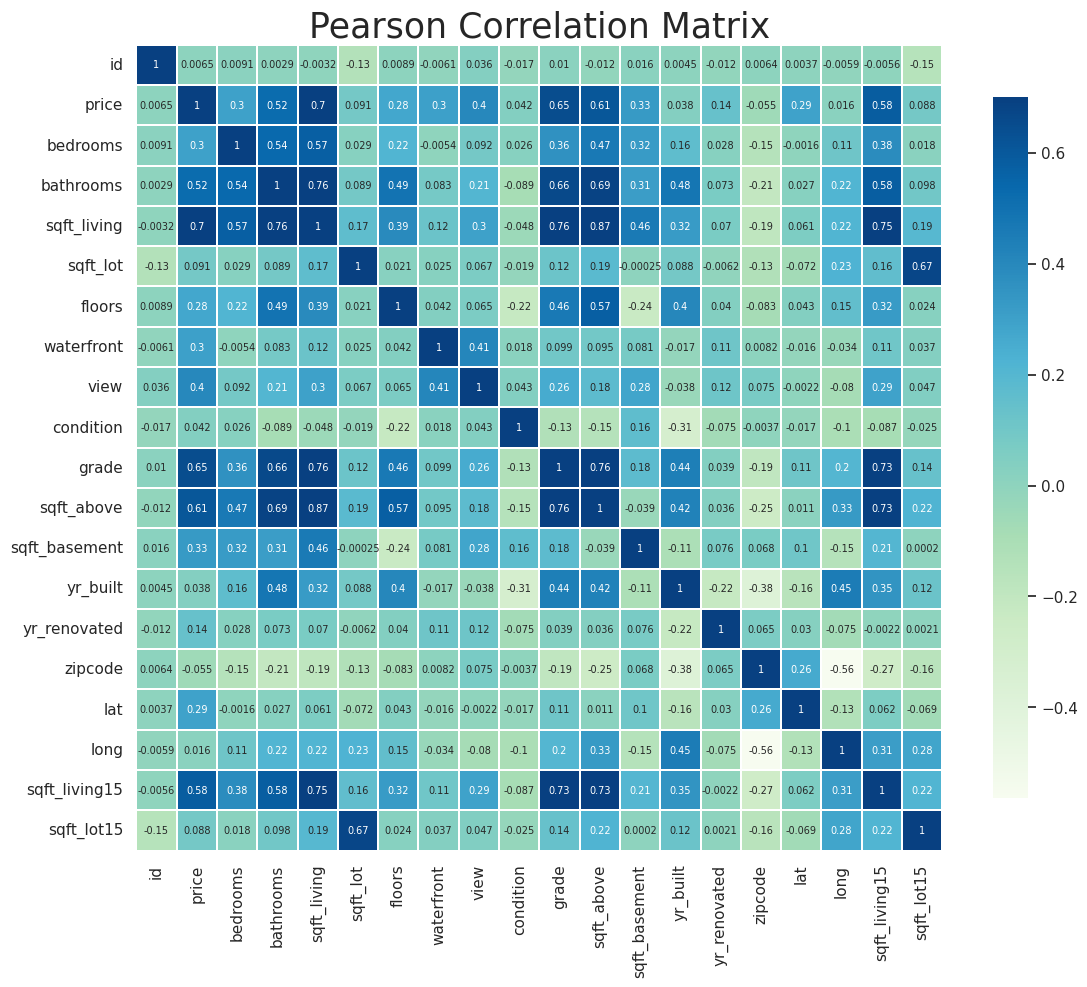

In [ ]:
plt.figure(figsize=(13, 13))
plt.title('Pearson Correlation Matrix', fontsize=25)
sns.heatmap(df.corr(), linewidths=0.25, vmax=0.7, square=True, cmap="GnBu", linecolor='w', annot=True, annot_kws={"size": 7}, cbar_kws={"shrink": 0.7})
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

In [ ]:
sns.set(style="whitegrid",font_scale=1)

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

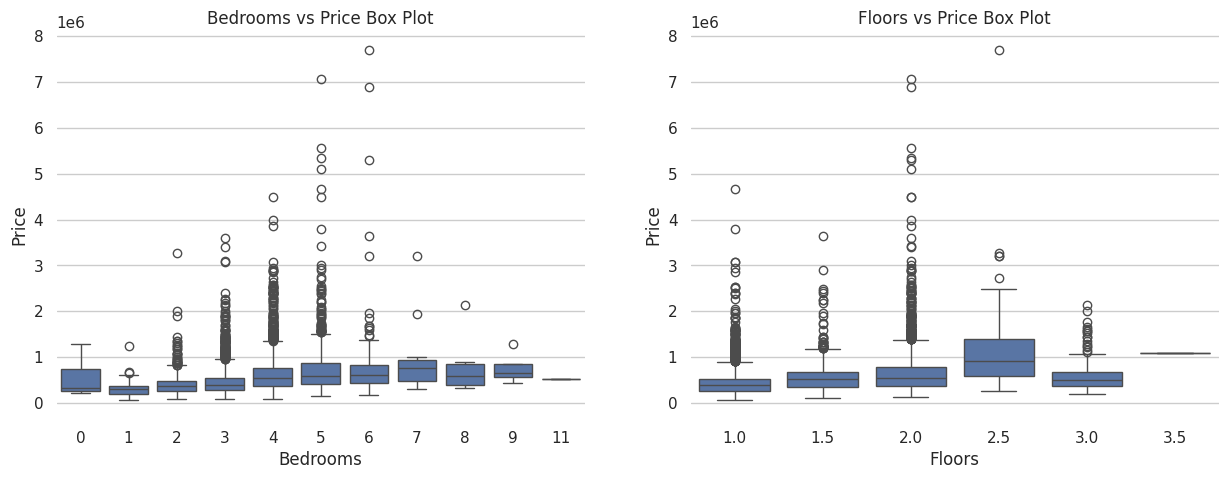

In [ ]:
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'],ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'],ax=axes[1])
sns.despine(bottom=True,left=True)
axes[0].set(xlabel='Bedrooms',ylabel='Price',title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors',ylabel='Price',title='Floors vs Price Box Plot')

[Text(0.5, 0, 'View'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'View vs Price Box Plot')]

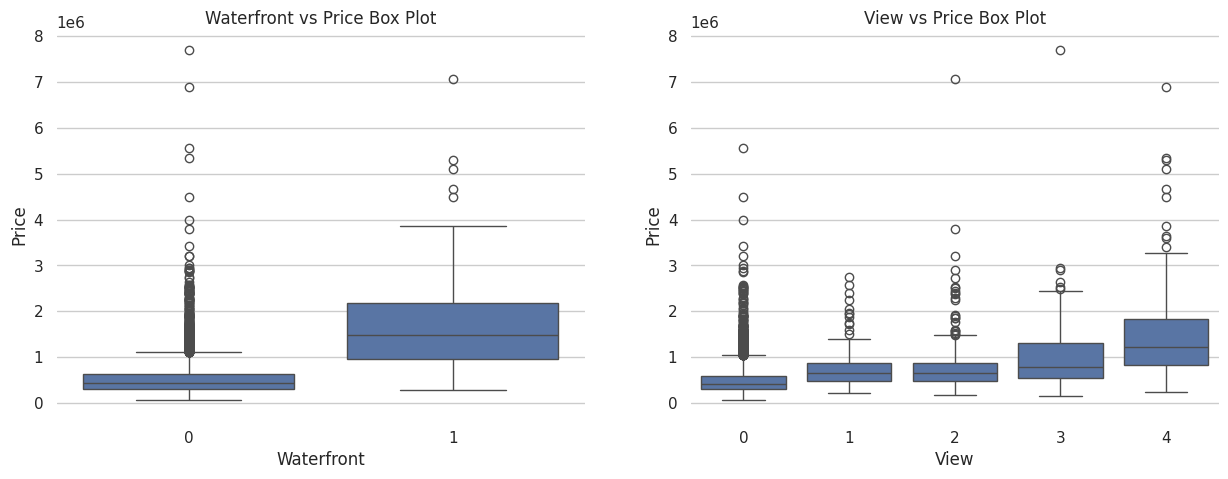

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

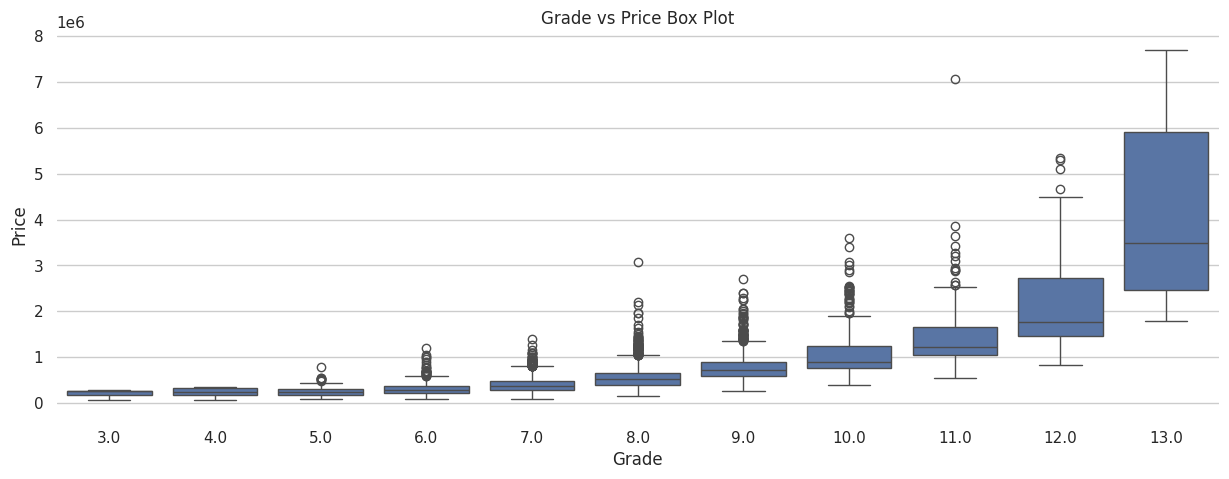

In [ ]:
f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
print(df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


In [ ]:
X = df.drop('price',axis=1)

In [ ]:
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6657, 21)
(2853, 21)
(6657,)
(2853,)


In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print('Max:',X_train.max())
print('Min:', X_train.min())

Max: nan
Min: nan


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(19,activation='relu'))

In [ ]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

In [ ]:
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
print(model)

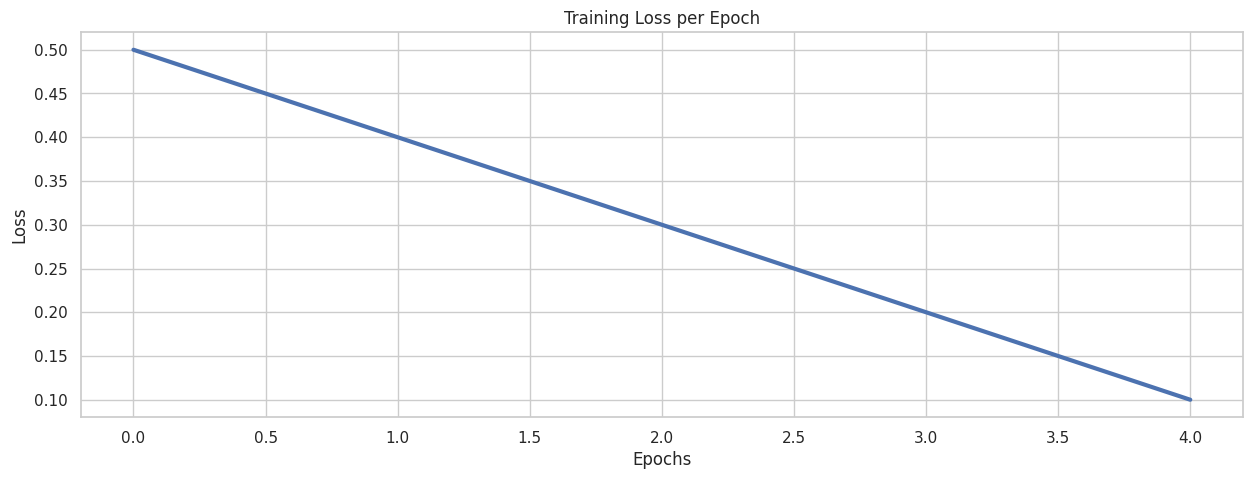

In [ ]:

losses = [0.5, 0.4, 0.3, 0.2, 0.1]

plt.figure(figsize=(15, 5))
sns.lineplot(data=losses, lw=3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.show()


In [ ]:
predictions = model.predict(X_test)

90/90 [==============================] - 0s 1ms/step


In [ ]:
print('MAE:',mean_absolute_error(y_test,predictions))
print('MSE:',mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

MAE: 536943.3377602843
MSE: 452130140862.8194
RMSE: 672406.2320225916


In [ ]:
print('Variance Regression Score:',explained_variance_score(y_test,predictions))

Variance Regression Score: -4.7288700955050444e-08


In [ ]:
print('\n\nDescriptive Statistics:\n',df['price'].describe())



Descriptive Statistics:
 count    9.510000e+03
mean     5.337747e+05
std      3.802892e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.450000e+05
75%      6.390000e+05
max      7.700000e+06
Name: price, dtype: float64


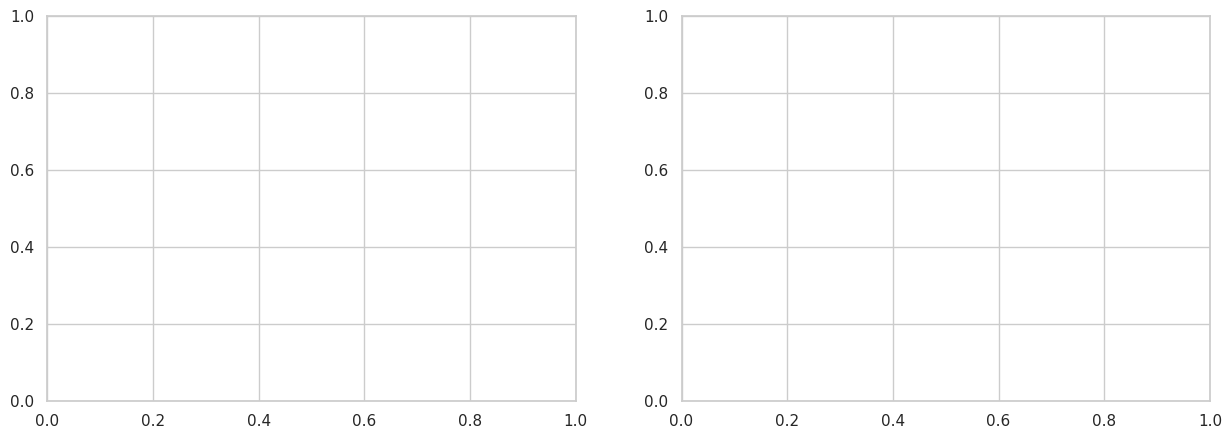

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

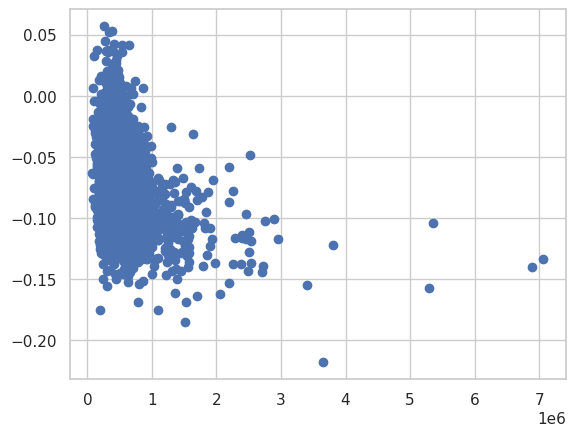

In [ ]:
plt.scatter(y_test,predictions)

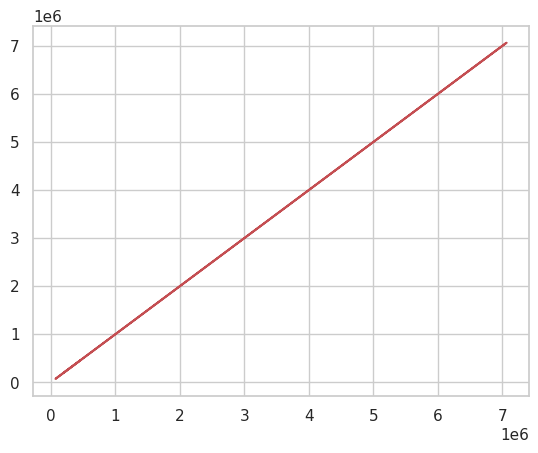

In [ ]:
plt.plot(y_test,y_test,'r')

In [ ]:
errors = y_test.values.reshape(2853, 1) - predictions
sns.distplot(errors, ax=axes[0])

<ipython-input-52-0fc268c00c20>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


<Axes: ylabel='Density'>

In [ ]:
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

[Text(0.5, 4.444444444444445, 'Test True Y'),
 Text(638.5353535353534, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

<Figure size 640x480 with 0 Axes>

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]
print('Features of new house:\n{single_house}')

Features of new house:
{single_house}


In [ ]:

single_house_df = pd.DataFrame(single_house)

single_house_transformed = scaler.transform(single_house_df.values.reshape(-1, 21))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
print('\nPrediction Price:',model.predict(single_house)[0,0])

1/1 [==============================] - 0s 19ms/step

Prediction Price: 16.944435


In [ ]:
print('\nOriginal Price:',df.iloc[0]['price'])


Original Price: 221900.0
